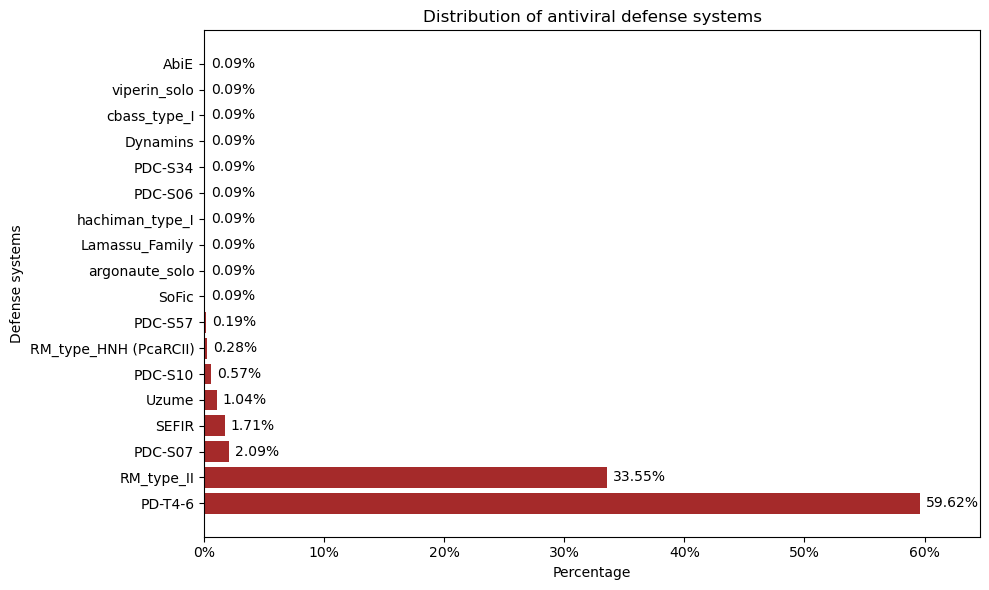

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Cargar el archivo Excel
file_path = 'graficos.xlsx'  # Ruta del archivo
df = pd.read_excel(file_path)

# Asegurarse de que la columna subtype existe
if 'subtype' not in df.columns:
    print("La columna 'subtype' no se encuentra en el archivo")
else:
    # Contar las ocurrencias de cada subtipo
    subtype_counts = df['subtype'].value_counts()
    
    # Calcular los porcentajes de cada subtipo
    subtype_percentages = (subtype_counts / subtype_counts.sum()) * 100

    # Figura A: Gráfico de barras horizontal con porcentajes
    plt.figure(figsize=(10, 6))
    bars = plt.barh(subtype_counts.index, subtype_percentages, color='brown')

    # Añadir los porcentajes encima de las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{width:.2f}%', va='center', fontsize=10)

    # Formatear el eje x para mostrar porcentajes
    def percentage(x, pos):
        return f'{x:.0f}%'
    
    formatter = FuncFormatter(percentage)
    plt.gca().xaxis.set_major_formatter(formatter)

    # Configurar títulos y etiquetas
    plt.title('Distribution of antiviral defense systems')
    plt.xlabel('Percentage')
    plt.ylabel('Defense systems')
    plt.xlim(0, max(subtype_percentages) + 5)  # Ajustar el límite del eje x
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()
